In [1]:
pip install fastf1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.7/148.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.1/164.1 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 3.0 MB/s eta 0:00:00


In [2]:
import fastf1 as f1
import pandas as pd

Get Session Details

In [3]:
year = 2024
grand_prix = 'italy'

In [4]:
session_fp1 = f1.get_session(year, grand_prix, 'FP1')
session_fp2 = f1.get_session(year, grand_prix, 'FP2')
session_fp3 = f1.get_session(year, grand_prix, 'FP3')

# Load lap data for each session
session_fp1.load()
session_fp2.load()
session_fp3.load()

# Get laps for each session
laps_fp1 = session_fp1.laps
laps_fp2 = session_fp2.laps
laps_fp3 = session_fp3.laps

req         WARNING 	DEFAULT CACHE ENABLED! (24.0 KB) /root/.cache/fastf1
events      WARNING 	Correcting user input 'italy' to 'Italian Grand Prix'
events      WARNING 	Correcting user input 'italy' to 'Italian Grand Prix'
events      WARNING 	Correcting user input 'italy' to 'Italian Grand Prix'
core           INFO 	Loading data for Italian Grand Prix - Practice 1 [v3.4.1]
INFO:fastf1.fastf1.core:Loading data for Italian Grand Prix - Practice 1 [v3.4.1]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching

In [5]:
laps_all = pd.concat([laps_fp1, laps_fp2, laps_fp3])

# Optional: Add a column to indicate the session (FP1, FP2, FP3)
laps_fp1['Session'] = 'FP1'
laps_fp2['Session'] = 'FP2'
laps_fp3['Session'] = 'FP3'

# Combine again after adding the session column
laps_all = pd.concat([laps_fp1, laps_fp2, laps_fp3])

# Reset index for easier access
laps_all.reset_index(drop=True, inplace=True)

# Display combined data
print(laps_all.head())

                    Time Driver DriverNumber                LapTime  \
0 0 days 00:17:15.830000    VER            1                    NaT   
1 0 days 00:19:25.499000    VER            1 0 days 00:02:09.669000   
2 0 days 00:21:36.688000    VER            1 0 days 00:02:11.189000   
3 0 days 00:23:01.381000    VER            1 0 days 00:01:24.693000   
4 0 days 00:37:29.630000    VER            1                    NaT   

   LapNumber  Stint             PitOutTime              PitInTime  \
0        1.0    1.0 0 days 00:14:50.596000                    NaT   
1        2.0    1.0                    NaT                    NaT   
2        3.0    1.0                    NaT                    NaT   
3        4.0    1.0                    NaT                    NaT   
4        5.0    1.0                    NaT 0 days 00:25:34.902000   

             Sector1Time            Sector2Time  ...             Team  \
0                    NaT 0 days 00:00:37.004000  ...  Red Bull Racing   
1 0 days 00:

In [6]:
selected_columns = ['Driver', 'LapTime', 'Compound', 'Sector1Time', 'Sector2Time', 'Sector3Time', 'Session']

lap_data_filtered = laps_all[selected_columns]

# Display the filtered lap data
print(lap_data_filtered.head())

  Driver                LapTime Compound            Sector1Time  \
0    VER                    NaT     SOFT                    NaT   
1    VER 0 days 00:02:09.669000     SOFT 0 days 00:00:36.897000   
2    VER 0 days 00:02:11.189000     SOFT 0 days 00:00:44.233000   
3    VER 0 days 00:01:24.693000     SOFT 0 days 00:00:28.098000   
4    VER                    NaT     SOFT 0 days 00:00:50.452000   

             Sector2Time            Sector3Time Session  
0 0 days 00:00:37.004000 0 days 00:00:44.118000     FP1  
1 0 days 00:00:55.060000 0 days 00:00:37.712000     FP1  
2 0 days 00:00:49.891000 0 days 00:00:37.065000     FP1  
3 0 days 00:00:28.729000 0 days 00:00:27.866000     FP1  
4                    NaT                    NaT     FP1  


In [7]:
laps_soft = lap_data_filtered[lap_data_filtered['Compound'] == 'SOFT']

# Step 2: Filter laps where lap time is less than 1 minute 30 seconds
time_limit = pd.Timedelta(minutes=1, seconds=30)
laps_below_1m30s = laps_soft[laps_soft['LapTime'] < time_limit]

# Optionally reset index for cleaner DataFrame
laps_below_1m30s.reset_index(drop=True, inplace=True)

# Display the filtered data
print(laps_below_1m30s)

    Driver                LapTime Compound            Sector1Time  \
0      VER 0 days 00:01:24.693000     SOFT 0 days 00:00:28.098000   
1      VER 0 days 00:01:23.088000     SOFT 0 days 00:00:27.470000   
2      VER 0 days 00:01:22.936000     SOFT 0 days 00:00:27.438000   
3      VER 0 days 00:01:21.676000     SOFT 0 days 00:00:27.005000   
4      VER 0 days 00:01:22.116000     SOFT 0 days 00:00:27.038000   
..     ...                    ...      ...                    ...   
195    BOT 0 days 00:01:21.989000     SOFT 0 days 00:00:26.888000   
196    PIA 0 days 00:01:20.887000     SOFT 0 days 00:00:26.825000   
197    PIA 0 days 00:01:20.859000     SOFT 0 days 00:00:26.704000   
198    PIA 0 days 00:01:20.252000     SOFT 0 days 00:00:26.621000   
199    PIA 0 days 00:01:25.107000     SOFT 0 days 00:00:26.448000   

               Sector2Time            Sector3Time Session  
0   0 days 00:00:28.729000 0 days 00:00:27.866000     FP1  
1   0 days 00:00:27.950000 0 days 00:00:27.668000  

In [8]:
driver_stats = laps_below_1m30s.groupby('Driver').agg(
    best_lap_fp1=('LapTime', lambda x: x[laps_below_1m30s['Session'] == 'FP1'].min()),
    best_lap_fp2=('LapTime', lambda x: x[laps_below_1m30s['Session'] == 'FP2'].min()),
    best_lap_fp3=('LapTime', lambda x: x[laps_below_1m30s['Session'] == 'FP3'].min()),
    avg_lap_fp1=('LapTime', lambda x: x[laps_below_1m30s['Session'] == 'FP1'].mean()),
    avg_lap_fp2=('LapTime', lambda x: x[laps_below_1m30s['Session'] == 'FP2'].mean()),
    avg_lap_fp3=('LapTime', lambda x: x[laps_below_1m30s['Session'] == 'FP3'].mean()),
    laps_fp1=('LapTime', lambda x: (laps_below_1m30s['Session'] == 'FP1').sum()),
    laps_fp2=('LapTime', lambda x: (laps_below_1m30s['Session'] == 'FP2').sum()),
    laps_fp3=('LapTime', lambda x: (laps_below_1m30s['Session'] == 'FP3').sum())
).reset_index()


In [9]:
# Get the qualifying data
quali_session = f1.get_session(2023, grand_prix, 'Q')
quali_session.load()
quali_laps = quali_session.laps

# Find the driver with the fastest lap time in qualifying (pole sitter)
pole_sitter = quali_laps.loc[quali_laps['LapTime'].idxmin()]['Driver']

# Create a binary target column where the pole sitter is 1, and others are 0
driver_stats['Pole'] = (driver_stats['Driver'] == pole_sitter).astype(int)


core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.4.1]
INFO:fastf1.fastf1.core:Loading data for Italian Grand Prix - Qualifying [v3.4.1]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for sess

In [10]:
from sklearn.model_selection import train_test_split

# Define features (all columns except 'Driver' and 'Pole')
X = driver_stats.drop(['Driver', 'Pole'], axis=1)

# Define target (Pole sitter: 1 = pole, 0 = not pole)
y = driver_stats['Pole']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
print(X_train.dtypes)

best_lap_fp1    timedelta64[ns]
best_lap_fp2    timedelta64[ns]
best_lap_fp3    timedelta64[ns]
avg_lap_fp1     timedelta64[ns]
avg_lap_fp2     timedelta64[ns]
avg_lap_fp3     timedelta64[ns]
laps_fp1                  int64
laps_fp2                  int64
laps_fp3                  int64
dtype: object


In [12]:
# Convert the timedelta columns to total seconds
driver_stats['best_lap_fp1'] = driver_stats['best_lap_fp1'].dt.total_seconds()
driver_stats['best_lap_fp2'] = driver_stats['best_lap_fp2'].dt.total_seconds()
driver_stats['best_lap_fp3'] = driver_stats['best_lap_fp3'].dt.total_seconds()

driver_stats['avg_lap_fp1'] = driver_stats['avg_lap_fp1'].dt.total_seconds()
driver_stats['avg_lap_fp2'] = driver_stats['avg_lap_fp2'].dt.total_seconds()
driver_stats['avg_lap_fp3'] = driver_stats['avg_lap_fp3'].dt.total_seconds()


In [13]:
print(driver_stats.dtypes)

Driver           object
best_lap_fp1    float64
best_lap_fp2    float64
best_lap_fp3    float64
avg_lap_fp1     float64
avg_lap_fp2     float64
avg_lap_fp3     float64
laps_fp1          int64
laps_fp2          int64
laps_fp3          int64
Pole              int64
dtype: object


In [14]:
# Check for missing values
print(X_train.isnull().sum())

best_lap_fp1    1
best_lap_fp2    2
best_lap_fp3    1
avg_lap_fp1     1
avg_lap_fp2     2
avg_lap_fp3     1
laps_fp1        0
laps_fp2        0
laps_fp3        0
dtype: int64


In [15]:
X_train.dropna(inplace=True)
y_train = y_train[X_train.index]  # Align y_train with the filtered X_train

In [16]:
print(X_train.shape, y_train.shape)

(13, 9) (13,)


In [17]:
print(X_train.dtypes)


best_lap_fp1    timedelta64[ns]
best_lap_fp2    timedelta64[ns]
best_lap_fp3    timedelta64[ns]
avg_lap_fp1     timedelta64[ns]
avg_lap_fp2     timedelta64[ns]
avg_lap_fp3     timedelta64[ns]
laps_fp1                  int64
laps_fp2                  int64
laps_fp3                  int64
dtype: object


In [18]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Convert all timedelta columns to total seconds
timedelta_cols = ['best_lap_fp1', 'best_lap_fp2', 'best_lap_fp3',
                  'avg_lap_fp1', 'avg_lap_fp2', 'avg_lap_fp3']

for col in timedelta_cols:
    X_train[col] = X_train[col].dt.total_seconds()
    X_test[col] = X_test[col].dt.total_seconds()

# Now fit the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

print(y_pred)


[0 0 0 0 0]


In [19]:
# Check for missing values in X_test
print(X_test.isnull().sum())

best_lap_fp1    1
best_lap_fp2    0
best_lap_fp3    0
avg_lap_fp1     1
avg_lap_fp2     0
avg_lap_fp3     0
laps_fp1        0
laps_fp2        0
laps_fp3        0
dtype: int64


In [20]:
# Drop missing values (if applicable)
X_test.dropna(inplace=True)

# Or fill with mean (ensure you use the same method as for X_train)
X_test.fillna(X_test.mean(), inplace=True)

In [21]:
import pandas as pd

# Assuming X_train and X_test are your original DataFrames with features

# Apply One-Hot Encoding to both train and test sets
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Align train and test sets to ensure they have the same columns
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Now, check for missing values in the encoded sets
print(X_train_encoded.isnull().sum())
print(X_test_encoded.isnull().sum())

# Fit the model (if not already fitted)
model.fit(X_train_encoded, y_train)

# Predict on the test set
y_pred = model.predict(X_test_encoded)


best_lap_fp1    0
best_lap_fp2    0
best_lap_fp3    0
avg_lap_fp1     0
avg_lap_fp2     0
avg_lap_fp3     0
laps_fp1        0
laps_fp2        0
laps_fp3        0
dtype: int64
best_lap_fp1    0
best_lap_fp2    0
best_lap_fp3    0
avg_lap_fp1     0
avg_lap_fp2     0
avg_lap_fp3     0
laps_fp1        0
laps_fp2        0
laps_fp3        0
dtype: int64


In [22]:
print(X_test.isnull().sum())

best_lap_fp1    0
best_lap_fp2    0
best_lap_fp3    0
avg_lap_fp1     0
avg_lap_fp2     0
avg_lap_fp3     0
laps_fp1        0
laps_fp2        0
laps_fp3        0
dtype: int64


In [24]:
# Make sure to drop or fill missing values in X_test as done previously
# For example, if you dropped rows:
X_test.dropna(inplace=True)

# Ensure y_test is also updated accordingly
y_test = y_test[X_test.index]  # Align y_test with the filtered X_test

In [25]:
print("y_test shape:", y_test.shape)
print("y_pred shape:", y_pred.shape)

y_test shape: (4,)
y_pred shape: (4,)


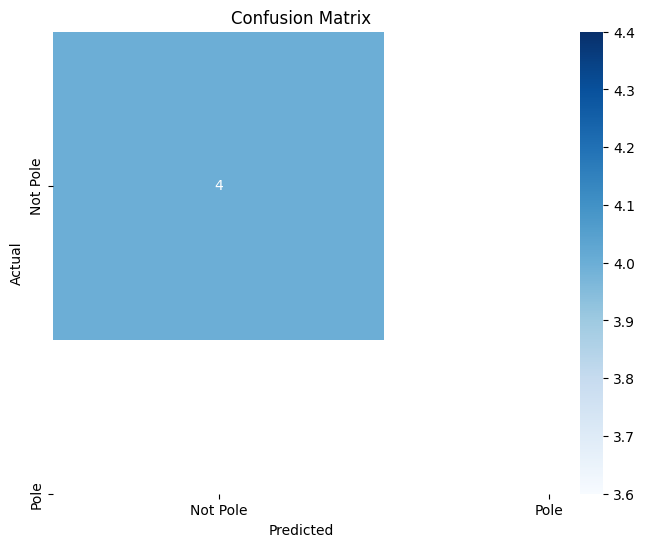

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Pole', 'Pole'], yticklabels=['Not Pole', 'Pole'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Test Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Confusion Matrix:
[[4]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


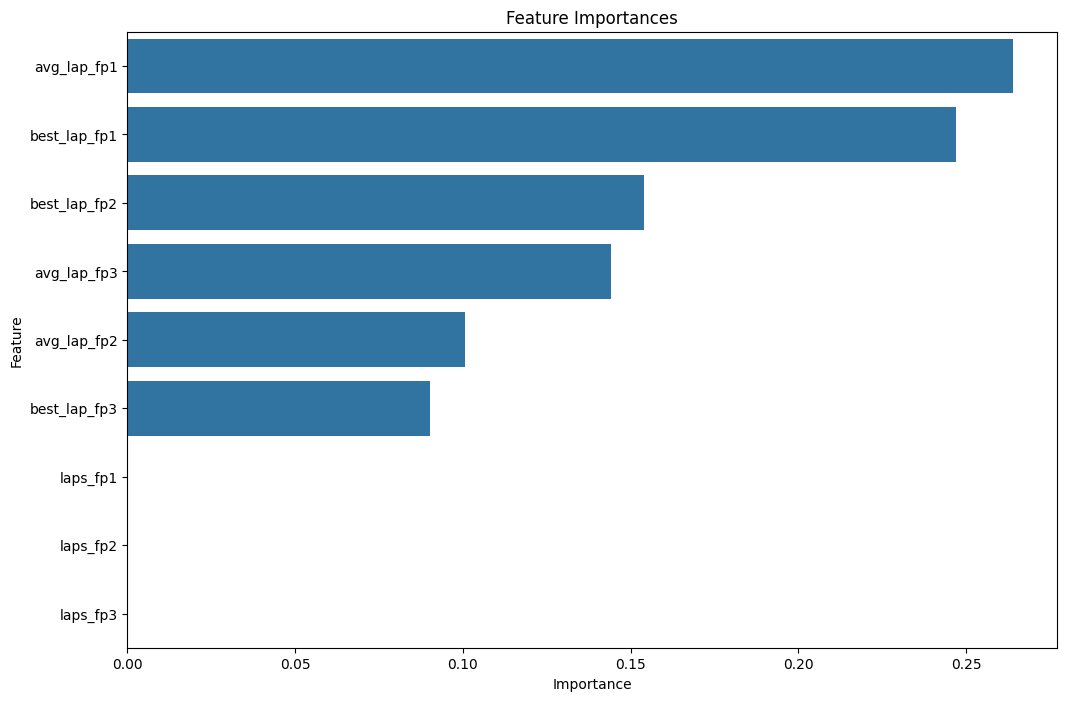

In [28]:
# Get feature importances
importances = model.feature_importances_
feature_names = X_train_encoded.columns

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()
